# Evaluate effects of ribosome and tRNA variation

In [1]:
import cPickle as pkl
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import pandas as pd

## 1. Ribosome capacity utilization

In [2]:
runs = [
r"/home/martin/git/TRSL/results/100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160425_1059_1200s.p",
r"/home/martin/git/TRSL/results/100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1717_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1812_1200s.p",
r"/home/martin/git/TRSL/results/200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1955_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_2115_1200s.p",
r"/home/martin/git/TRSL/results/300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_2349_1200s.p"]

Function to replace `_numpypy.multiarray` by `numpy.core.multiarray`. Source: http://stackoverflow.com/questions/39086/search-and-replace-a-line-in-a-file-in-python

In [3]:
from tempfile import mkstemp
from shutil import move
from os import remove, close

def replace(file_path, pattern, subst):
    # Create temp file
    fh, abs_path = mkstemp()
    with open(abs_path, 'w') as new_file:
        with open(file_path) as old_file:
            for line in old_file:
                new_file.write(line.replace(pattern, subst))
    close(fh)
    # Remove original file
    remove(file_path)
    # Move new file
    move(abs_path, file_path)

In [4]:
for run in runs:
    print run
    #replace(run, "_numpypy.multiarray", "numpy.core.multiarray") # takes long time

/home/martin/git/TRSL/results/100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160425_1059_1200s.p
/home/martin/git/TRSL/results/100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1717_1200s.p
/home/martin/git/TRSL/results/200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1812_1200s.p
/home/martin/git/TRSL/results/200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_1955_1200s.p
/home/martin/git/TRSL/results/300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160422_2115_1200s.p
/home/martin/git/TRSL/results/300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah_20160

Absolute bound ribosomes:

100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah


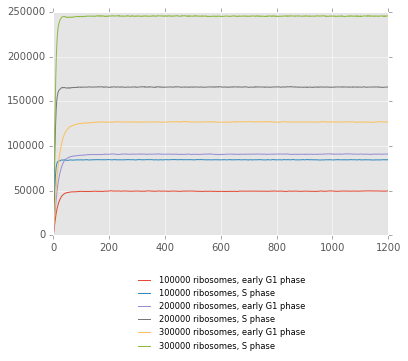

In [5]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'lower center'

for run in runs:
    results = pkl.load(open(run))
    print results['description']
    plt.plot(results["timerange"], results["timecourses"]["ribos._bound"], 
             label=results['description'].split('transcriptome')[0].strip())

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -0.55)).get_frame()
legend.set_facecolor('white')

Bound ribosomes per total ribosomes:

transcriptome length: 15126
100000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
100000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 15126
200000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
200000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 15126
300000 ribosomes, early G1 phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah
transcriptome length: 72542
300000 ribosomes, S phase transcriptome, full exome, no decay, median-enhanced initiation rates according to Shah


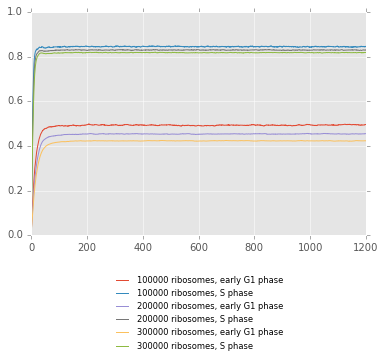

In [6]:
from matplotlib.font_manager import FontProperties

fontP = FontProperties()
fontP.set_size('small')
    
plt.rcParams['legend.loc'] = 'lower center'

for run in runs:
    results = pkl.load(open(run))
    print "transcriptome length: {}".format(len(results['transcriptome']))
    print results['description']
    plt.plot(results["timerange"], np.array(results["timecourses"]["ribos._bound"]) * 1.0 /
             (np.array(results["timecourses"]["ribos._bound"])+np.array(results["timecourses"]["ribos._free"])), 
             label=results['description'].split('transcriptome')[0].strip())
    plt.ylim([0.0, 1.0])

legend = plt.legend(prop = fontP, bbox_to_anchor=(0.5, -0.55)).get_frame()
legend.set_facecolor('white')

Limited but still visible impact of the ribosome count. If fewer ribosomes are in the system, relatively more are bound.

The effect is stronger in early G1 phase when there are fewer mRNAs, so that a ribosome will find more often an initiation site occupied by another ribosome.

Is the reduction proportional to the reduction in the transcriptome?

In [7]:
transcriptome_length = {'S': 72542, 'early G1': 15126}

In [8]:
transcriptome_length['S'] * 1.0 / transcriptome_length['early G1']

4.795848208382917

No, the ratios of bound ribosomes in S and early G1 phases are more like 1.6:1 or 2:1.

## 2. Dependency of translation efficiency on mRNA abundance

Measure genome level protein synthesis rates:

In [9]:
orf_genomic_dict = pkl.load(open("../parameters/orf_coding.p"))

In [10]:
timecourses = {}

for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    timecourses[ribos] = {}
    
for run in runs:
    labellist = run.split(r"/")[-1].split(r",")
    ribos = int(labellist[0].split()[0])
    phase = labellist[1].split("phase")[0].strip()
    results = pkl.load(open(run))
    timecourses[ribos][phase] = results['timecourses'] # we can now address as timecourses[100000]['S'] etc.
    
    # some genes have 5999, some 6000 timepoints, we have to fix that
    print "fixing uneven time series lengths..."
    num_timepoints = min([len(timecourses[ribos][phase][gene]) for gene in timecourses[ribos][phase]])

    print "creating timecourses..."
    timecourses[ribos][phase] = {key: timecourses[ribos][phase][key][:num_timepoints] 
                                 for key in timecourses[ribos][phase]
                                 if key in orf_genomic_dict}

fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...
fixing uneven time series lengths...
creating timecourses...


In [11]:
phases = transcriptome_length.keys()
ribo_numbers = timecourses.keys()

Genome-level transcriptional efficiency:

First we calculate the sum of proteins per phase per ribosome count per simulation time.

In [12]:
data = pd.Panel4D(timecourses)
data

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 3 (labels) x 2 (items) x 5999 (major_axis) x 5016 (minor_axis)
Labels axis: 100000 to 300000
Items axis: S to early G1
Major_axis axis: 0 to 5998
Minor_axis axis: YAL001C to YPR199C

Convert from count to real simulation time:

In [13]:
data.rename_axis(mapper=lambda x: 0.2*x, axis=2, inplace=True)

In [14]:
data

<class 'pandas.core.panelnd.Panel4D'>
Dimensions: 3 (labels) x 2 (items) x 5999 (major_axis) x 5016 (minor_axis)
Labels axis: 100000 to 300000
Items axis: S to early G1
Major_axis axis: 0.0 to 1199.6
Minor_axis axis: YAL001C to YPR199C

In [15]:
data[100000]

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 5999 (major_axis) x 5016 (minor_axis)
Items axis: S to early G1
Major_axis axis: 0.0 to 1199.6
Minor_axis axis: YAL001C to YPR199C

In [16]:
data[100000]['S'].tail()

,YAL001C,YAL002W,YAL003W,YAL005C,YAL007C,YAL008W,YAL009W,YAL011W,YAL012W,YAL013W,...,YPR186C,YPR187W,YPR188C,YPR189W,YPR190C,YPR191W,YPR192W,YPR196W,YPR198W,YPR199C
1198.8,25,15,10138,1882,281,199,87,12,6181,155,...,66,890,127,80,58,126,30,24,37,8
1199.0,25,15,10138,1882,281,199,87,12,6182,155,...,66,890,127,80,58,126,30,24,37,8
1199.2,25,15,10140,1883,281,199,87,12,6183,155,...,66,890,127,80,58,126,30,24,37,8
1199.4,25,15,10140,1884,281,199,87,12,6184,155,...,66,890,127,80,58,126,30,24,37,8
1199.6,25,15,10140,1885,281,199,87,12,6185,155,...,66,891,127,80,58,126,30,24,37,8


In [47]:
total_protein = data.sum(axis=3)
total_protein

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 2 (major_axis) x 5999 (minor_axis)
Items axis: 100000 to 300000
Major_axis axis: S to early G1
Minor_axis axis: 0.0 to 1199.6

In [48]:
total_protein[200000]

,0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,...,1197.8,1198.0,1198.2,1198.4,1198.6,1198.8,1199.0,1199.2,1199.4,1199.6
S,0,0,0,0,0,0,0,0,0,0,...,6767079,6768251,6769363,6770428,6771578,6772789,6773925,6775050,6776200,6777384
early G1,0,0,0,0,0,0,0,0,1,1,...,3725252,3725881,3726492,3727130,3727759,3728390,3729001,3729683,3730306,3730939


Define translational efficiency by calculating the difference quotient between $t=1200$ s and $t=900$ s. The first 900 seconds are the burn-in time.

For completely unclear reasons 1199.6 does not work in the following:

In [58]:
(total_protein.minor_xs(1199.4) - total_protein.minor_xs(899.2))/(1199.4 - 899.2)/ribo_numbers

,100000,200000,300000
S,0.027502,0.028448,0.028653
early G1,0.017063,0.015797,0.014508


One might hypothesize that an optimum number of ribos exists...